In [1]:
import matplotlib.pyplot as plt

import tangos
import numpy as np

In [2]:
tangos.all_simulations()

[<Simulation("cosmo25")>]

## Let's explore on the last timestep

In [86]:
sim = tangos.get_simulation("cosmo25") 
ts = sim.timesteps[-6]
halo = ts.halos[0]

In [87]:
halo.keys()

['shrink_center',
 'max_radius',
 'Mvir',
 'Mgas',
 'Mbar',
 'Mstar',
 'dustExt_V',
 'dustExt_B',
 'dustExt_K',
 'dustExt_U',
 'dustExt_J',
 'dustExt_I',
 'SFR_histogram',
 'SFR_encl_25Myr',
 'SFR_encl_250Myr',
 'dm_density_profile',
 'dm_mass_profile',
 'tot_density_profile',
 'tot_mass_profile',
 'gas_density_profile',
 'gas_mass_profile',
 'star_density_profile',
 'star_mass_profile',
 'MColdGas',
 'MHIGas',
 'gas_image_sideon',
 'stellar_image_sideon',
 'gas_image_faceon',
 'stellar_image_faceon',
 'gas_image_original',
 'stellar_image_original',
 'Vcom',
 'inner_SFR_histogram',
 'compton_y_map',
 'v_surface_brightness',
 'b_surface_brightness',
 'i_surface_brightness',
 'lambda',
 'lambdaE',
 'lambda_gas',
 'lambdaE_gas',
 'HIMass_encl',
 'ColdGasMass_encl',
 'ptcls_in_common',
 'ptcls_in_common',
 'BH',
 'BH',
 'BH',
 'BH',
 'BH',
 'BH',
 'BH',
 'BH',
 'BH',
 'BH',
 'BH',
 'BH',
 'BH',
 'BH',
 'BH',
 'BH',
 'BH',
 'BH',
 'BH',
 'BH',
 'BH',
 'BH',
 'BH',
 'BH',
 'BH',
 'BH',
 'BH

In [5]:
tangos.get_simulation("cosmo25").timesteps[-1].halos[35026]

<Halo 'cosmo25/cosmo25p.768sg1bwK1BHe75.008192/halo_35164' | NDM=1001 Nstar=0 Ngas=0>

### A quick figure of all halos in the last timestep

In [106]:
tstep = tangos.get_simulation("cosmo25").timesteps[-1]

key = 'Mvir'
arr = []
for i in range(35027):
    if key in tstep.halos[i].keys():
        arr.append(tstep.halos[i][key])

Error closing cursor
Traceback (most recent call last):
  File "/home/jw1624/miniconda3/lib/python3.9/site-packages/sqlalchemy/engine/result.py", line 1813, in _fetchall_impl
    return list(self.iterator)
  File "/home/jw1624/miniconda3/lib/python3.9/site-packages/sqlalchemy/orm/loading.py", line 147, in chunks
    fetch = cursor._raw_all_rows()
  File "/home/jw1624/miniconda3/lib/python3.9/site-packages/sqlalchemy/engine/result.py", line 392, in _raw_all_rows
    rows = self._fetchall_impl()
  File "/home/jw1624/miniconda3/lib/python3.9/site-packages/sqlalchemy/engine/cursor.py", line 1819, in _fetchall_impl
    return self.cursor_strategy.fetchall(self, self.cursor)
  File "/home/jw1624/miniconda3/lib/python3.9/site-packages/sqlalchemy/engine/cursor.py", line 995, in fetchall
    self.handle_exception(result, dbapi_cursor, e)
  File "/home/jw1624/miniconda3/lib/python3.9/site-packages/sqlalchemy/engine/cursor.py", line 955, in handle_exception
    result.connection._handle_dbapi_exc

KeyboardInterrupt: 

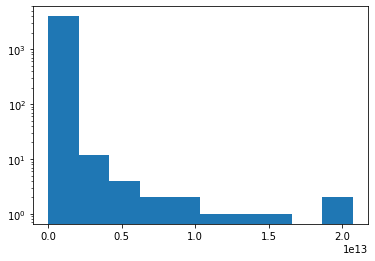

In [61]:
plt.hist(arr)
plt.yscale('log')

In [65]:
tangos.get_simulation("cosmo25").timesteps[-1]

<TimeStep 'cosmo25/cosmo25p.768sg1bwK1BHe75.008192' z=-0.00 t=13.80 Gyr>

## Satellite/Central

In [6]:
halo.calculate('shrink_center')

array([ 5473.84330678, -3631.29389501,  8631.45066168])

In [7]:
halo.calculate('max_radius')

828.0029296875

In [8]:
halo.calculate('Mvir')

20923887151797.17

In [18]:
centers = ts.calculate_all('shrink_center')[0]
radii = ts.calculate_all('max_radius')[0]
masses = ts.calculate_all('Mvir')[0]

In [104]:
satellites = []
for i in range(4000):
    offsets = np.linalg.norm(centers[i] - centers[masses>masses[i]], axis=1)
    host_mask = offsets<(radii[masses>masses[i]])
    if True in host_mask:
        satellites.append(i)

In [105]:
satellites

[38,
 49,
 54,
 58,
 59,
 62,
 72,
 78,
 85,
 86,
 88,
 94,
 96,
 97,
 102,
 112,
 113,
 119,
 123,
 124,
 127,
 129,
 137,
 141,
 142,
 150,
 160,
 161,
 162,
 167,
 168,
 176,
 180,
 199,
 202,
 204,
 213,
 217,
 218,
 223,
 226,
 229,
 230,
 231,
 248,
 255,
 256,
 264,
 267,
 271,
 278,
 290,
 296,
 300,
 301,
 317,
 320,
 323,
 326,
 330,
 332,
 351,
 357,
 362,
 368,
 371,
 373,
 374,
 376,
 381,
 382,
 384,
 385,
 390,
 399,
 402,
 414,
 422,
 423,
 424,
 425,
 426,
 428,
 429,
 434,
 435,
 442,
 447,
 454,
 455,
 462,
 470,
 471,
 473,
 479,
 493,
 499,
 500,
 503,
 504,
 508,
 510,
 522,
 523,
 526,
 530,
 542,
 544,
 545,
 551,
 555,
 560,
 562,
 577,
 582,
 589,
 592,
 597,
 599,
 604,
 606,
 607,
 611,
 612,
 630,
 637,
 638,
 639,
 642,
 644,
 646,
 652,
 656,
 666,
 667,
 669,
 674,
 678,
 680,
 682,
 690,
 692,
 694,
 696,
 698,
 700,
 711,
 716,
 718,
 721,
 723,
 724,
 725,
 731,
 741,
 742,
 744,
 749,
 752,
 756,
 765,
 776,
 787,
 788,
 800,
 812,
 813,
 843,
 849,
